In [ ]:

# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATA SET UAP/Student_performance_10k.csv')
data.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [ ]:

# Convert relevant columns to numeric (force errors to NaN)
data['math_score'] = pd.to_numeric(data['math_score'], errors='coerce')

In [ ]:
# Drop rows where the target ('grade') is missing
if 'grade' not in data.columns:
    print("Error: 'grade' column not found in the dataset.")
else:
    data_cleaned = data.dropna(subset=['grade'])

In [ ]:
# Fill missing numerical columns with their mean
numerical_cols = ['lunch', 'test_preparation_course', 'math_score',
                  'reading_score', 'writing_score', 'science_score', 'total_score']
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].mean())

# Fill missing categorical columns with the mode
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education']
for col in categorical_cols:
    if col in data_cleaned.columns:
        data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])
    else:
        print(f"Warning: {col} column not found in the dataset.")

<ipython-input-24-bfecb7ac6dad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].mean())
<ipython-input-24-bfecb7ac6dad>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])


In [ ]:
# Encode categorical features and the target column
label_encoders = {}
for col in categorical_cols + ['grade']:
    if col in data_cleaned.columns:
        le = LabelEncoder()
        data_cleaned[col] = le.fit_transform(data_cleaned[col])
        label_encoders[col] = le
    else:
        print(f"Error: {col} column not found for encoding.")

<ipython-input-25-8b1a4c4f4238>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-25-8b1a4c4f4238>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-25-8b1a4c4f4238>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:

# Define features and target
if 'grade' in data_cleaned.columns:
    X = data_cleaned.drop(columns=['roll_no', 'grade'])
    y = data_cleaned['grade']

In [ ]:

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize and train Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)




In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoders['grade'].classes_)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
# Display results
print(f"Accuracy: {accuracy * 100:.2f}%\\n")
print("Classification Report:\\n", report)


Accuracy: 99.90%\n
Classification Report:\n               precision    recall  f1-score   support

           A       1.00      0.99      0.99       181
           B       1.00      1.00      1.00      1132
           C       1.00      1.00      1.00       540
           D       1.00      1.00      1.00       134
        Fail       1.00      1.00      1.00        13

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



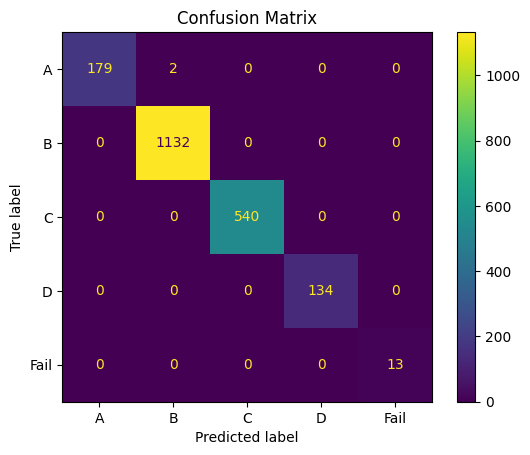

In [ ]:
if 'grade' in data_cleaned.columns:
    # Plot confusion matrix
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoders['grade'].classes_)
    display.plot(cmap='viridis')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Error: 'grade' column not found in cleaned dataset.")


In [ ]:
import pickle

# Simpan model Random Forest
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model berhasil disimpan ke file 'model.pkl'")


Model berhasil disimpan ke file 'model.pkl'
